In [8]:
!/opt/conda/envs/hunyuan_venv/bin/python -m pip install pytorch3d
!/opt/conda/envs/hunyuan_venv/bin/python -m pip install pyrender
!/opt/conda/envs/hunyuan_venv/bin/python -m pip install shapely

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.0/30.0 MB 127.0 kB/s eta 0:00:0000:0200:07
  Created wheel for fvcore: filename=fvcore-0.1.5.post20221221-py3-none-any.whl size=61398 sha256=dd8aade96db9c99dac4c3674c34274e46bd7c562256e0d297fdd88012303dcb0
  Stored in directory: /tmp/pip-ephem-wheel-cache-679ii6aj/wheels/b8/79/07/c0e9367f5b5ea325e246bd73651e8af175fabbef943043b1cc
  Created wheel for iopath: filename=iopath-0.1.10-py3-none-any.whl size=31529 sha256=b99ce0faa2be462bb04c1bcceb2e0c3a93c6c7953452bf549572f5416ebe2fc8
  Stored in directory: /tmp/pip-ephem-wheel-cache-679ii6aj/wheels/89/3e/24/0f349c0b2eeb6965903035f3b00dbb5c9bea437b4a2f18d82c
Successfully built fvcore iopath


In [58]:
!/opt/conda/envs/hunyuan_venv/bin/python -m pip install trimesh[easy]


Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 7.3 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.2/17.2 MB 34.2 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 18.0 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 543.2/543.2 kB 93.4 MB/s eta 0:00:00
  Created wheel for pycollada: filename=pycollada-0.9-py3-none-any.whl size=128468 sha256=800adffd041387cc41a4727d74e8fae00e3f6d4f780c6797831b5f364b1513c6
  Stored in directory: /tmp/pip-ephem-wheel-cache-msr5ltjb/wheels/9d/98/f2/b66042e84f9be9a5d7090b316e221059ac504b16689f837725
Successfully built pycollada


In [1]:
import trimesh
import pytorch3d
import pyrender
import shapely
import numpy as np

In [353]:
mesh_path = '~/project_2_3d_human/Hunyuan3D-2/test3_mesh.glb'

In [354]:
mesh = trimesh.load(mesh_path, force='mesh')
true_height = 192
scale_factor = true_height / mesh.extents[1]
mesh.apply_scale(scale_factor)
mesh.show()

In [358]:
print('\tWidth\tHeight\tThickness\n', mesh.extents)

	Width	Height	Thickness
 [ 53.26195817 192.          38.34029857]


In [166]:
vertices = mesh.vertices

# Определяем верхнюю и нижнюю границы
max_z = vertices[:, 1].max()  # Макушка
min_z = vertices[:, 1].min()  # Самая нижняя точка (стопы)

# Попробуем найти реальную нижнюю границу, усреднив низшие 10% точек
threshold = np.percentile(vertices[:, 1], 10)
foot_vertices = vertices[vertices[:, 1] <= threshold]
avg_foot_z = np.mean(foot_vertices[:, 1])  # Средняя высота стоп

# Теперь считаем рост от уровня стоп
height_corrected = max_z - avg_foot_z

print(f"Обычный рост: {max_z - min_z:.2f}")
print(f"Исправленный рост (по стопам): {height_corrected:.2f}")

Обычный рост: 170.00
Исправленный рост (по стопам): 166.23


In [59]:
print(vertices)

[[-0.18826239 -0.99503309 -0.02579969]
 [-0.19238579 -0.99071878 -0.02330744]
 [-0.18799905 -0.99433339 -0.01852983]
 ...
 [ 0.18867199  0.6461823   0.01039373]
 [ 0.19205026  0.60956818 -0.02203204]
 [ 0.19244248  0.6224404  -0.01865659]]


# Useful methods
1. section(plane_normal: Buffer | _SupportsArray[dtype[Any]] | _NestedSequence[_SupportsArray[dtype[Any]]] | bool | int | float | complex | str | bytes | _NestedSequence[bool | int | float | complex | str | bytes], plane_origin: Buffer | _SupportsArray[dtype[Any]] | _NestedSequence[_SupportsArray[dtype[Any]]] | bool | int | float | complex | str | bytes | _NestedSequence[bool | int | float | complex | str | bytes], **kwargs) → Path3D | None
Returns a 3D cross section of the current mesh and a plane defined by origin and normal.

Parameters:
plane_normal ((3,) float) – Normal vector of section plane.

plane_origin ((3, ) float) – Point on the cross section plane.

Returns:
Curve of intersection or None if it was not hit by plane.

Return type:
intersections
    
2. slice_plane(plane_origin, plane_normal, cap=False, face_index=None, cached_dots=None, **kwargs)
Slice the mesh with a plane, returning a new mesh that is the portion of the original mesh to the positive normal side of the plane

plane_origin(3,) float
Point on plane to intersect with mesh

plane_normal(3,) float
Normal vector of plane to intersect with mesh

capbool
If True, cap the result with a triangulated polygon

face_index((m,) int)
Indexes of mesh.faces to slice. When no mask is provided, the default is to slice all faces.

cached_dots(n, 3) float
If an external function has stored dot products pass them here to avoid recomputing

Returns:
new_mesh – Subset of current mesh that intersects the half plane to the positive normal side of the plane

Return type:
trimesh.Trimesh or None
    
3. voxelized(pitch, method='subdivide', **kwargs)
Return a VoxelGrid object representing the current mesh discretized into voxels at the specified pitch

Parameters:
pitch (float) – The edge length of a single voxel

method (implementation key. See trimesh.voxel.creation.voxelizers)

**kwargs (additional kwargs passed to the specified implementation.)

Returns:
voxelized – Representing the current mesh

Return type:
VoxelGrid object

In [363]:
bounds = mesh.bounds  # [[min_x, min_y, min_z], [max_x, max_y, max_z]]
print(bounds)
min_x, min_y, min_z = bounds[0]
max_x, max_y, max_z = bounds[1]

num_slices = 24
# Разбиваем диапазон Y на 8 равных слайсов
y_slices = np.linspace(min_y, max_y, num_slices + 1)

# Список для хранения частей модели
sliced_parts = []

# Для каждого слайса создаем ограничивающий бокс и пересекаем его с исходным мешем
for i in range(num_slices):
    slice_min_y = y_slices[i]
    slice_max_y = y_slices[i+1]
    
    # Создаем боксовый меш, который полностью покрывает диапазоны по X и Z, 
    # а по Y ограничен slice_min_y и slice_max_y.
    box_extents = np.array([
        max_x - min_x,  # размер по X
        slice_max_y - slice_min_y,  # размер по Y (для слайса)
        max_z - min_z   # размер по Z
    ])
    box_center = np.array([
        (max_x + min_x) / 2,
        (slice_max_y + slice_min_y) / 2,
        (max_z + min_z) / 2
    ])
    
    box = trimesh.creation.box(extents=box_extents, transform=trimesh.transformations.translation_matrix(box_center))
    
    # Выполняем булевое пересечение (intersection) меша и бокса
    slice_mesh = trimesh.boolean.intersection([mesh, box], engine="manifold")
    
    if slice_mesh is not None and len(slice_mesh.vertices) > 0:
        sliced_parts.append(slice_mesh)
        # Можно сохранить каждую часть:
        slice_mesh.export(f"slice_{i+1}.glb")
    else:
        print(f"Слайс {i+1} пустой или не удалось вычислить пересечение.")

print(f"Модель успешно разделена на {num_slices} частей по оси Y с помощью булевых операций!")

[[-26.85707425 -96.24856107 -19.00179992]
 [ 26.40488392  95.75143893  19.33849866]]
Модель успешно разделена на 24 частей по оси Y с помощью булевых операций!


In [364]:
submesh_path = '~/project_2_3d_human/Model_evaluation/slice_20.glb'
submesh = trimesh.load(submesh_path, force='mesh')
submesh.show()

55.75143893275124 63.75143893275124


<ipython-input-375-8914fb423c1d>:14: DeprecationWarning: DEPRECATED: replace `path.to_planar`->`path.to_2D), removal 1/1/2026
  slice_2D, to_3D = section.to_planar()


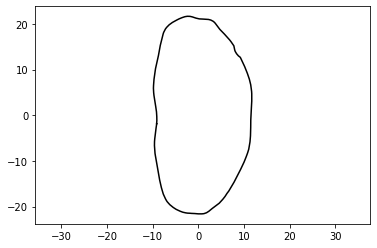

Max width = 43.30218862982231, Max perimeter = 107.30480752208858


In [375]:
min_y = y_slices[19]
max_y = y_slices[20]
print(min_y, max_y)

perimeters_dict = {}

num_sections = 50
y_sections = np.linspace(min_y, max_y, num_sections)
for i, y_section in enumerate(y_sections):
    plane_origin = [0, y_section, 0]
    plane_normal = [0, 1, 0]
    section = submesh.section(plane_normal, plane_origin)
    if(section is not None):
        slice_2D, to_3D = section.to_planar()
        perimeters_dict[slice_2D] = max(slice_2D.vertices[:, 1]) - min(slice_2D.vertices[:, 1])

max_slice = max(perimeters_dict, key=perimeters_dict.get)
max_slice.show()
print(f'Max width = {perimeters_dict[max_slice]}, Max perimeter = {max_slice.length}')

    

In [187]:
vertices = max_slice.vertices

# Выбираем 10% верхних и нижних точек по Y
num_points = len(vertices)
top_10_percent = int(num_points * 0.1)
bottom_10_percent = int(num_points * 0.1)

# Сортируем точки по оси Y
sorted_vertices = vertices[vertices[:, 1].argsort()]

# Получаем верхние и нижние 10% точек
top_points = sorted_vertices[:top_10_percent]
bottom_points = sorted_vertices[-bottom_10_percent:]

# Получаем самую левую и самую правую точки по оси X
left_point = vertices[np.argmin(vertices[:, 0])]
right_point = vertices[np.argmax(vertices[:, 0])]

# Создаем список всех выбранных точек
# Правильный порядок: сначала левая точка, затем верхние, потом правая и нижние
selected_points = np.vstack([sorted_vertices[left_point], sorted_vertices[top_points], sorted_vertices[right_point], 
                             sorted_vertices[bottom_points]])

# Порядок: сначала левая, затем верхние, затем правая, затем нижние
selected_points_sorted = np.vstack([left_point, top_points, right_point, bottom_points])

# Пересчитываем периметр для этих точек
perimeter = 0
for i in range(len(selected_points_sorted)):
    next_point = selected_points_sorted[(i + 1) % len(selected_points_sorted)]
    perimeter += np.linalg.norm(selected_points_sorted[i] - next_point)

# Выводим периметр
print(f"Периметр обхвата плеч: {perimeter}")

# Показать слайс с выбранными точками
plt.figure()
plt.scatter(vertices[:, 0], vertices[:, 1], label="Исходный слайс")
plt.scatter(selected_points_sorted[:, 0], selected_points_sorted[:, 1], label="Обхват плеч", linestyle='--', color='red')
plt.legend()
plt.show()

IndexError: arrays used as indices must be of integer (or boolean) type

In [66]:
import scipy
from scipy.signal import find_peaks


def curvature(points):
    """Вычисляем кривизну для точек контура"""
    dx = np.gradient(points[:, 0])
    dy = np.gradient(points[:, 1])
    ddx = np.gradient(dx)
    ddy = np.gradient(dy)
    curvature = np.abs(ddx * dy - dx * ddy) / (dx**2 + dy**2)**(3/2)
    return curvature


curv = curvature(submesh.vertices)
peaks, _ = find_peaks(curv, prominence=0.05)
print(peaks)

[   1    3    7 ... 4307 4309 4311]


<ipython-input-66-7a8a4eef767a>:11: RuntimeWarning: invalid value encountered in divide
  curvature = np.abs(ddx * dy - dx * ddy) / (dx**2 + dy**2)**(3/2)


<ipython-input-66-7a8a4eef767a>:11: RuntimeWarning: invalid value encountered in divide
  curvature = np.abs(ddx * dy - dx * ddy) / (dx**2 + dy**2)**(3/2)


IndexError: index 0 is out of bounds for axis 0 with size 0

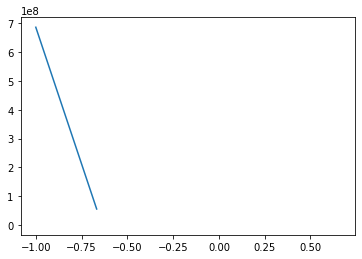

In [67]:
import matplotlib.pyplot as plt

# Храним кривизну и уровни Y
curvatures = []
slice_heights = []

for i, slice_mesh in enumerate(sliced_parts):
    # Берем точки среза
    slice_points = np.array(slice_mesh.vertices)

    # Если есть достаточно точек для анализа
    if len(slice_points) > 10:
        curv = curvature(slice_points)
        curvatures.append(np.max(curv))  # Берем максимум кривизны для этого слоя
        slice_heights.append(y_slices[i])  # Запоминаем высоту слоя

# Ищем пик кривизны (там, где плечи)
peaks, _ = find_peaks(curvatures, prominence=0.05)  # Ищем наиболее выраженные пики

# Определяем высоту плеч
shoulder_height = slice_heights[peaks[0]] if peaks.size > 0 else None

# График
plt.plot(slice_heights, curvatures, label="Макс. кривизна по слоям")
plt.scatter([shoulder_height], [curvatures[peaks[0]]], color="red", label="Плечи")
plt.xlabel("Высота по Y")
plt.ylabel("Макс. кривизна")
plt.legend()
plt.show()

print(f"Определенная высота плеч: {shoulder_height:.2f} (в единицах модели)")